### 1. Definizione degli obiettivi
- **Obiettivo principale**: Identificare in Italia un settore lavorativo insaturo in termini di adozione delle tecnologie ICT su cui poter investire.
- **Obiettivi secondari**: Analizzare i livelli di diffusione delle ICT in diversi settori italiani, individuare le tendenze di crescita e comprendere i fattori che influenzano l'adozione delle ICT.

#### 1.1 Settori ICT presi in indagine
- Social media
- Commercio elettronico
- Cloud computing
- Analisi di Big Data
- Intelligenza artificiale
- Robotica e stampa 3D
- Tecnologie per l'organizzazione interna, di filiera e IoT
- Competenze e formazione in ICT

### 2. Raccolta dei dati
I dataset presi in analisi sono stati estrapolati da [Istat](http://dati.istat.it) per effettuare un'analisi solamente sul suolo italiano. Per ciascuno di essi ho preso in considerazione i dati disponibili negli ultimi 5 anni.

### 3. Preparazione dei dati

In [282]:
# librerie utilizzate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [240]:
directory = 'dataset/ict_markets'
ict_category_map = {}

# Trova tutti i file .csv nella directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Stampa i file trovati
for i, csv_file in enumerate(csv_files):
    ict_category_map[i] = os.path.splitext(csv_file)[0].split("ict_")[1]

In [241]:
ict_category_map

{0: 'ai',
 1: 'big_data',
 2: 'cloud_computing',
 3: 'commercio_elettronico',
 4: 'competenze_formazione',
 5: 'iot',
 6: 'robotica_stampa3d',
 7: 'sicurezza_informatica',
 8: 'social_media'}

In [242]:
# creazione dei dataframe
df_ict_social_media = pd.read_csv("dataset/ict_markets/ict_social_media.csv", sep=",")
df_ict_commercio_elettronico = pd.read_csv("dataset/ict_markets/ict_commercio_elettronico.csv", sep=",")
df_ict_cloud_computing = pd.read_csv("dataset/ict_markets/ict_cloud_computing.csv", sep=",")
df_ict_big_data = pd.read_csv("dataset/ict_markets/ict_big_data.csv", sep=",")
df_ict_ai = pd.read_csv("dataset/ict_markets/ict_ai.csv", sep=",")
df_ict_robotica_stampa3d = pd.read_csv("dataset/ict_markets/ict_robotica_stampa3d.csv", sep=",")
df_ict_iot = pd.read_csv("dataset/ict_markets/ict_iot.csv", sep=",")
df_ict_competenze_formazione = pd.read_csv("dataset/ict_markets/ict_competenze_formazione.csv", sep=",")

In [288]:
# Utils
def prepare_ict_market_df(df, ict_cat):
    # Drop colonne meno influenti e rename
    df = df.drop(columns=["ITTER107", "Territorio", "Classe di addetti", "Seleziona periodo", "Flag Codes", "Flags"])
    df = df.rename(columns={"VARICT": "ICT code", "Tipo dato": "ICT desc", "ATECO_2007": "ATECO code", "Ateco 2007": "ATECO desc", "TIME": "Year"})
    
    # Ordino il dataframe per "Year" decresente
    df = df.sort_values(by="Year", ascending=False)

    # Dove ci sono dei valori null, ho deciso di inserire il valore dell'anno precedente
    df["Value"] = df.apply(lambda row: fill_with_previous(row, df), axis=1)

    # Rimuovo le righe dove "CLLVT" = "W_GE10" per ottenere più omogeneità
    df = df[df["CLLVT"] != "W_GE10"]

    # Aggiungo la colonna "Size" che è la copia di "CLLVT" per avere una dimensione numerica
    df["Size"] = df["CLLVT"].map({"W10_49": 50, "W50_99": 100, "W100_249": 250, "W_GE250": 300})

    # Aggiungo la colonna "ICT cat" che rappresenta la "famiglia" ICT tra quelle analizzate
    df["ICT cat"] = ict_cat

    def fill_with_previous(row, df_tmp):
        year = row["Year"]
        ict_code = row["ICT code"]
        ateco_code = row["ATECO code"]

        if pd.isna(row["Value"]):
            # Cerco se negli anni precedenti ci sono dei valori per la specifica combinazione di ict e settore
            # (il df è già ordinato per anno decrescente)
            previous_values = df_tmp[(df_tmp["Year"] < year) & (df_tmp["ICT code"] == ict_code) & (df_tmp["ATECO code"] == ateco_code)]["Value"]
            if (len(previous_values) > 0):
                # Restituisce il primo valore non nullo, altrimenti 0
                return next((value for value in previous_values if value is not None and not math.isnan(value)), 0)
            return 0
        else:
            return row["Value"]
    return df


#### 3.1 Social media

In [244]:
# info dataset
df_ict_social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           1225 non-null   object 
 1   Territorio         1225 non-null   object 
 2   VARICT             1225 non-null   object 
 3   Tipo dato          1225 non-null   object 
 4   ATECO_2007         1225 non-null   object 
 5   Ateco 2007         1225 non-null   object 
 6   CLLVT              1225 non-null   object 
 7   Classe di addetti  1225 non-null   object 
 8   TIME               1225 non-null   int64  
 9   Seleziona periodo  1225 non-null   int64  
 10  Value              1223 non-null   float64
 11  Flag Codes         2 non-null      object 
 12  Flags              2 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 124.5+ KB


In [245]:
df_ict_social_media = prepare_ict_market_df(df_ict_social_media, ict_category_map[8])

In [246]:
df_ict_social_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1224 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    500 non-null    object 
 1   ICT desc    500 non-null    object 
 2   ATECO code  500 non-null    object 
 3   ATECO desc  500 non-null    object 
 4   CLLVT       500 non-null    object 
 5   Year        500 non-null    int64  
 6   Value       500 non-null    float64
 7   Size        500 non-null    int64  
 8   ICT cat     500 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 39.1+ KB


#### 3.2 Commercio elettronico 

In [247]:
# info dataset
df_ict_commercio_elettronico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           3455 non-null   object 
 1   Territorio         3455 non-null   object 
 2   VARICT             3455 non-null   object 
 3   Tipo dato          3455 non-null   object 
 4   ATECO_2007         3455 non-null   object 
 5   Ateco 2007         3455 non-null   object 
 6   CLLVT              3455 non-null   object 
 7   Classe di addetti  3455 non-null   object 
 8   TIME               3455 non-null   int64  
 9   Seleziona periodo  3455 non-null   int64  
 10  Value              3316 non-null   float64
 11  Flag Codes         139 non-null    object 
 12  Flags              139 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 351.0+ KB


In [248]:
df_ict_commercio_elettronico = prepare_ict_market_df(df_ict_commercio_elettronico, ict_category_map[3])

In [249]:
df_ict_commercio_elettronico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 3454 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    1400 non-null   object 
 1   ICT desc    1400 non-null   object 
 2   ATECO code  1400 non-null   object 
 3   ATECO desc  1400 non-null   object 
 4   CLLVT       1400 non-null   object 
 5   Year        1400 non-null   int64  
 6   Value       1400 non-null   float64
 7   Size        1400 non-null   int64  
 8   ICT cat     1400 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 109.4+ KB


#### 3.3 Cloud computing

In [250]:
# info dataset
df_ict_cloud_computing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           2107 non-null   object 
 1   Territorio         2107 non-null   object 
 2   VARICT             2107 non-null   object 
 3   Tipo dato          2107 non-null   object 
 4   ATECO_2007         2107 non-null   object 
 5   Ateco 2007         2107 non-null   object 
 6   CLLVT              2107 non-null   object 
 7   Classe di addetti  2107 non-null   object 
 8   TIME               2107 non-null   int64  
 9   Seleziona periodo  2107 non-null   int64  
 10  Value              2094 non-null   float64
 11  Flag Codes         13 non-null     object 
 12  Flags              13 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 214.1+ KB


In [251]:
df_ict_cloud_computing = prepare_ict_market_df(df_ict_cloud_computing, ict_category_map[2])

In [252]:
df_ict_cloud_computing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 2106 to 979
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    860 non-null    object 
 1   ICT desc    860 non-null    object 
 2   ATECO code  860 non-null    object 
 3   ATECO desc  860 non-null    object 
 4   CLLVT       860 non-null    object 
 5   Year        860 non-null    int64  
 6   Value       860 non-null    float64
 7   Size        860 non-null    int64  
 8   ICT cat     860 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 67.2+ KB


#### 3.4 Analisi di big data

In [253]:
# info dataset
df_ict_big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           882 non-null    object 
 1   Territorio         882 non-null    object 
 2   VARICT             882 non-null    object 
 3   Tipo dato          882 non-null    object 
 4   ATECO_2007         882 non-null    object 
 5   Ateco 2007         882 non-null    object 
 6   CLLVT              882 non-null    object 
 7   Classe di addetti  882 non-null    object 
 8   TIME               882 non-null    int64  
 9   Seleziona periodo  882 non-null    int64  
 10  Value              877 non-null    float64
 11  Flag Codes         5 non-null      object 
 12  Flags              5 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 89.7+ KB


In [254]:
# rimozione delle colonne meno influenti
df_ict_big_data = prepare_ict_market_df(df_ict_big_data, ict_category_map[1])

In [255]:
df_ict_big_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 441 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    360 non-null    object 
 1   ICT desc    360 non-null    object 
 2   ATECO code  360 non-null    object 
 3   ATECO desc  360 non-null    object 
 4   CLLVT       360 non-null    object 
 5   Year        360 non-null    int64  
 6   Value       360 non-null    float64
 7   Size        360 non-null    int64  
 8   ICT cat     360 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 28.1+ KB


#### 3.5 Intelligenza artificiale

In [256]:
# info dataset
df_ict_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           1960 non-null   object 
 1   Territorio         1960 non-null   object 
 2   VARICT             1960 non-null   object 
 3   Tipo dato          1960 non-null   object 
 4   ATECO_2007         1960 non-null   object 
 5   Ateco 2007         1960 non-null   object 
 6   CLLVT              1960 non-null   object 
 7   Classe di addetti  1960 non-null   object 
 8   TIME               1960 non-null   int64  
 9   Seleziona periodo  1960 non-null   int64  
 10  Value              1899 non-null   float64
 11  Flag Codes         61 non-null     object 
 12  Flags              61 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 199.2+ KB


In [257]:
# rimozione delle colonne meno influenti
df_ict_ai = prepare_ict_market_df(df_ict_ai, ict_category_map[0])

In [258]:
df_ict_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1959 to 1239
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    800 non-null    object 
 1   ICT desc    800 non-null    object 
 2   ATECO code  800 non-null    object 
 3   ATECO desc  800 non-null    object 
 4   CLLVT       800 non-null    object 
 5   Year        800 non-null    int64  
 6   Value       800 non-null    float64
 7   Size        800 non-null    int64  
 8   ICT cat     800 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 62.5+ KB


#### 3.6 Robotica e stampa 3D

In [259]:
# info dataset
df_ict_robotica_stampa3d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           539 non-null    object 
 1   Territorio         539 non-null    object 
 2   VARICT             539 non-null    object 
 3   Tipo dato          539 non-null    object 
 4   ATECO_2007         539 non-null    object 
 5   Ateco 2007         539 non-null    object 
 6   CLLVT              539 non-null    object 
 7   Classe di addetti  539 non-null    object 
 8   TIME               539 non-null    int64  
 9   Seleziona periodo  539 non-null    int64  
 10  Value              488 non-null    float64
 11  Flag Codes         51 non-null     object 
 12  Flags              51 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 54.9+ KB


In [260]:
df_ict_robotica_stampa3d = prepare_ict_market_df(df_ict_robotica_stampa3d, ict_category_map[6])

In [261]:
df_ict_robotica_stampa3d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 538 to 360
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    220 non-null    object 
 1   ICT desc    220 non-null    object 
 2   ATECO code  220 non-null    object 
 3   ATECO desc  220 non-null    object 
 4   CLLVT       220 non-null    object 
 5   Year        220 non-null    int64  
 6   Value       220 non-null    float64
 7   Size        220 non-null    int64  
 8   ICT cat     220 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.2+ KB


#### 3.7 Tecnologie per l'organizzazione interna, di filiera e IoT

In [262]:
# info dataset
df_ict_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           1421 non-null   object 
 1   Territorio         1421 non-null   object 
 2   VARICT             1421 non-null   object 
 3   Tipo dato          1421 non-null   object 
 4   ATECO_2007         1421 non-null   object 
 5   Ateco 2007         1421 non-null   object 
 6   CLLVT              1421 non-null   object 
 7   Classe di addetti  1421 non-null   object 
 8   TIME               1421 non-null   int64  
 9   Seleziona periodo  1421 non-null   int64  
 10  Value              1391 non-null   float64
 11  Flag Codes         30 non-null     object 
 12  Flags              30 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 144.4+ KB


In [263]:
# rimozione delle colonne meno influenti
df_ict_iot = prepare_ict_market_df(df_ict_iot, ict_category_map[5])

In [264]:
df_ict_iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 171
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    580 non-null    object 
 1   ICT desc    580 non-null    object 
 2   ATECO code  580 non-null    object 
 3   ATECO desc  580 non-null    object 
 4   CLLVT       580 non-null    object 
 5   Year        580 non-null    int64  
 6   Value       580 non-null    float64
 7   Size        580 non-null    int64  
 8   ICT cat     580 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 45.3+ KB


#### 3.8 Competenze e formazione in ICT

In [265]:
# Info dataset
df_ict_competenze_formazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ITTER107           1176 non-null   object 
 1   Territorio         1176 non-null   object 
 2   VARICT             1176 non-null   object 
 3   Tipo dato          1176 non-null   object 
 4   ATECO_2007         1176 non-null   object 
 5   Ateco 2007         1176 non-null   object 
 6   CLLVT              1176 non-null   object 
 7   Classe di addetti  1176 non-null   object 
 8   TIME               1176 non-null   int64  
 9   Seleziona periodo  1176 non-null   int64  
 10  Value              1171 non-null   float64
 11  Flag Codes         5 non-null      object 
 12  Flags              5 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 119.6+ KB


In [266]:
df_ict_competenze_formazione = prepare_ict_market_df(df_ict_competenze_formazione, ict_category_map[4])

In [267]:
df_ict_competenze_formazione.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 688 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    480 non-null    object 
 1   ICT desc    480 non-null    object 
 2   ATECO code  480 non-null    object 
 3   ATECO desc  480 non-null    object 
 4   CLLVT       480 non-null    object 
 5   Year        480 non-null    int64  
 6   Value       480 non-null    float64
 7   Size        480 non-null    int64  
 8   ICT cat     480 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 37.5+ KB


#### 3.9 Spese per l'innovazione

In [297]:
df_ict_outgoings_history = pd.read_csv("dataset/ict_outgoings_hist.csv", sep=",")

In [298]:
# Info dataset
df_ict_outgoings_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ITTER107                       3068 non-null   object 
 1   Territorio                     3068 non-null   object 
 2   TIPO_DATO_CIS                  3068 non-null   object 
 3   Indicatori                     3068 non-null   object 
 4   ATECO_2007                     3068 non-null   object 
 5   Ateco 2007                     3068 non-null   object 
 6   CLLVT                          3068 non-null   object 
 7   Classe di addetti              3068 non-null   object 
 8   FORMA_INNOVAZ                  3068 non-null   object 
 9   Caratteristiche delle imprese  3068 non-null   object 
 10  TIME                           3068 non-null   int64  
 11  Seleziona periodo              3068 non-null   int64  
 12  Value                          2980 non-null   f

In [299]:
# Rimozione delle colonne meno influenti
df_ict_outgoings_history = df_ict_outgoings_history.drop(columns=["ITTER107", "Territorio", "Indicatori", "Classe di addetti", "Seleziona periodo", "Flag Codes", "Flags"])
df_ict_outgoings_history = df_ict_outgoings_history.rename(columns={"ATECO_2007": "ATECO code", "Ateco 2007": "ATECO desc", "TIME": "Year"})

In [300]:
# Ordino il dataframe per "Year" decresente
df_ict_outgoings_history = df_ict_outgoings_history.sort_values(by="Year", ascending=False)

# Dove ci sono dei valori null, ho deciso di inserire il valore dell'anno precedente
def fill_with_previous_value(row, df_tmp):
    year = row["Year"]
    innov_code = row["FORMA_INNOVAZ"]
    ateco_code = row["ATECO code"]

    if pd.isna(row["Value"]):
        # Cerco se negli anni precedenti ci sono dei valori per la specifica combinazione di ict e settore
        # (il df è già ordinato per anno decrescente)
        previous_values = df_tmp[(df_tmp["Year"] < year) & (df_tmp["FORMA_INNOVAZ"] == innov_code) & (df_tmp["ATECO code"] == ateco_code)]["Value"]
        if (len(previous_values) > 0):
            # Restituisce il primo valore non nullo, altrimenti 0
            return next((value for value in previous_values if value is not None and not math.isnan(value)), 0)
        return 0
    else:
        return row["Value"]
    
df_ict_outgoings_history["Value"] = df_ict_outgoings_history.apply(lambda row: fill_with_previous_value(row, df_ict_outgoings_history), axis=1)

In [301]:
df_ict_outgoings_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 3067 to 1534
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TIPO_DATO_CIS                  3068 non-null   object 
 1   ATECO code                     3068 non-null   object 
 2   ATECO desc                     3068 non-null   object 
 3   CLLVT                          3068 non-null   object 
 4   FORMA_INNOVAZ                  3068 non-null   object 
 5   Caratteristiche delle imprese  3068 non-null   object 
 6   Year                           3068 non-null   int64  
 7   Value                          3068 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 215.7+ KB


### 4. Esplorazione e comparazione dei dati

In [275]:
df_ict_all = pd.concat([df_ict_social_media, df_ict_commercio_elettronico, df_ict_cloud_computing, df_ict_big_data, df_ict_ai, df_ict_robotica_stampa3d, df_ict_iot, df_ict_competenze_formazione])

In [276]:
df_ict_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 1224 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ICT code    5200 non-null   object 
 1   ICT desc    5200 non-null   object 
 2   ATECO code  5200 non-null   object 
 3   ATECO desc  5200 non-null   object 
 4   CLLVT       5200 non-null   object 
 5   Year        5200 non-null   int64  
 6   Value       5200 non-null   float64
 7   Size        5200 non-null   int64  
 8   ICT cat     5200 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 406.2+ KB


#### 4.1 **Primo grafico:** Tasso di adozione ICT negli ultimi anni per dimensioni aziendali


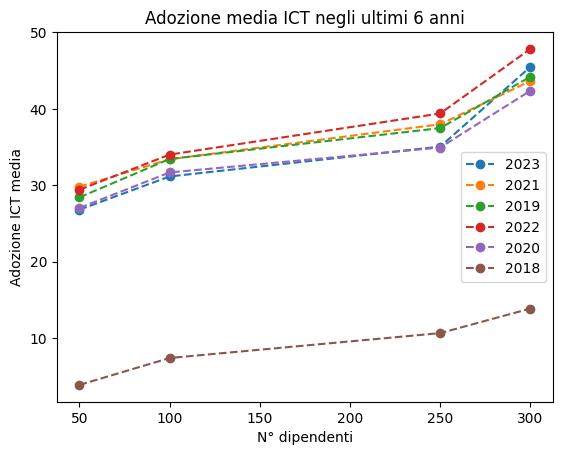

In [279]:
years = df_ict_all["Year"].unique()


for y in years:
    df_tmp = df_ict_all.loc[df_ict_all["Year"] == y, :].groupby("Size")["Value"].mean().reset_index().sort_values(by="Size")
    plt.plot(df_tmp["Size"], df_tmp["Value"], "o--", label=f"{y}" )

plt.title(f"Adozione media ICT negli ultimi {len(years)} anni")
plt.xlabel("N° dipendenti")
plt.ylabel("Adozione ICT media")
plt.legend()

#### 4.2 **Secondo grafico:** Evoluzione della distribuzione ICT per fasce di dimensione aziendale (2019/2023)

In [281]:
# Preparazione dei dati
df_ict_2019_2023 = df_ict_all[(df_ict_all["Year"] == 2019) | (df_ict_all["Year"] == 2023)]
years = df_ict_2019_2023["Year"].unique()

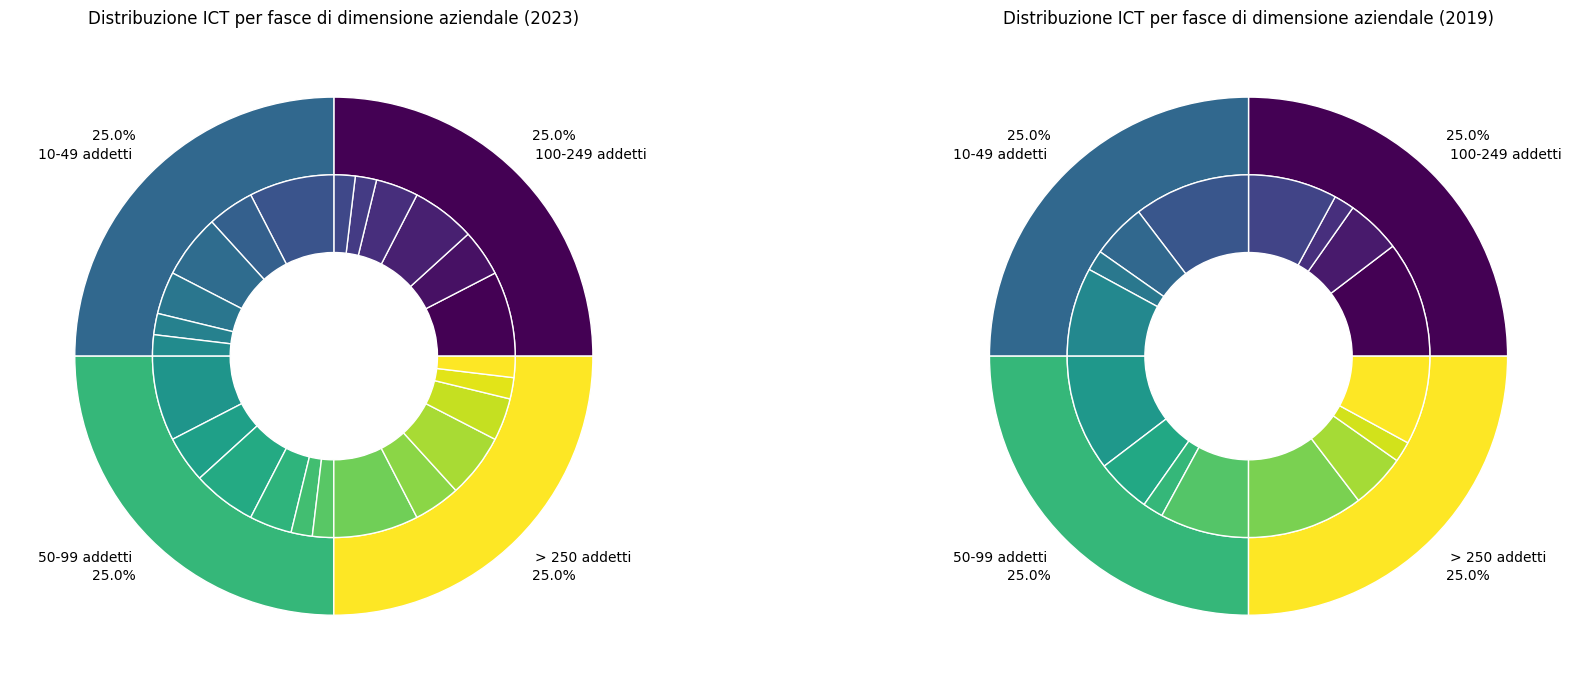

In [283]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
for i, y in enumerate(years):
    ax = axs[i]
    df_tmp = df_ict_2019_2023[df_ict_2019_2023["Year"] == y]

    # Distribuzione totale dell'ICT per CLLVT
    total_distribution = df_tmp.groupby('CLLVT').size()

    # Distribuzione delle tipologie di ICT per ciascun CLLVT
    ict_distribution = df_tmp.groupby(['CLLVT', 'ICT cat']).size().unstack()

    # Configurazione colori
    outer_colors = plt.cm.viridis(np.linspace(0, 1, len(total_distribution)))
    inner_colors = plt.cm.viridis(np.linspace(0, 1, ict_distribution.values.flatten().shape[0]))

    # Anello esterno
    outer_labels = total_distribution.index.map({"W10_49": "10-49 addetti", "W50_99": "50-99 addetti", "W100_249": "100-249 addetti", "W_GE250": "> 250 addetti"})
    outer_values = total_distribution.values

    ax.pie(outer_values, labels=outer_labels, radius=1, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%.1f%%", pctdistance=1.2)

    # Anello interno
    inner_values = ict_distribution.values.flatten()

    ax.pie(inner_values, radius=0.7, colors=inner_colors, wedgeprops=dict(width=0.3, edgecolor='w'))
    ax.set_title(f"Distribuzione ICT per fasce di dimensione aziendale ({y})")

plt.tight_layout()

#### 4.3 **Terzo grafico:** Evoluzione della diffusione ICT per settore lavorativo

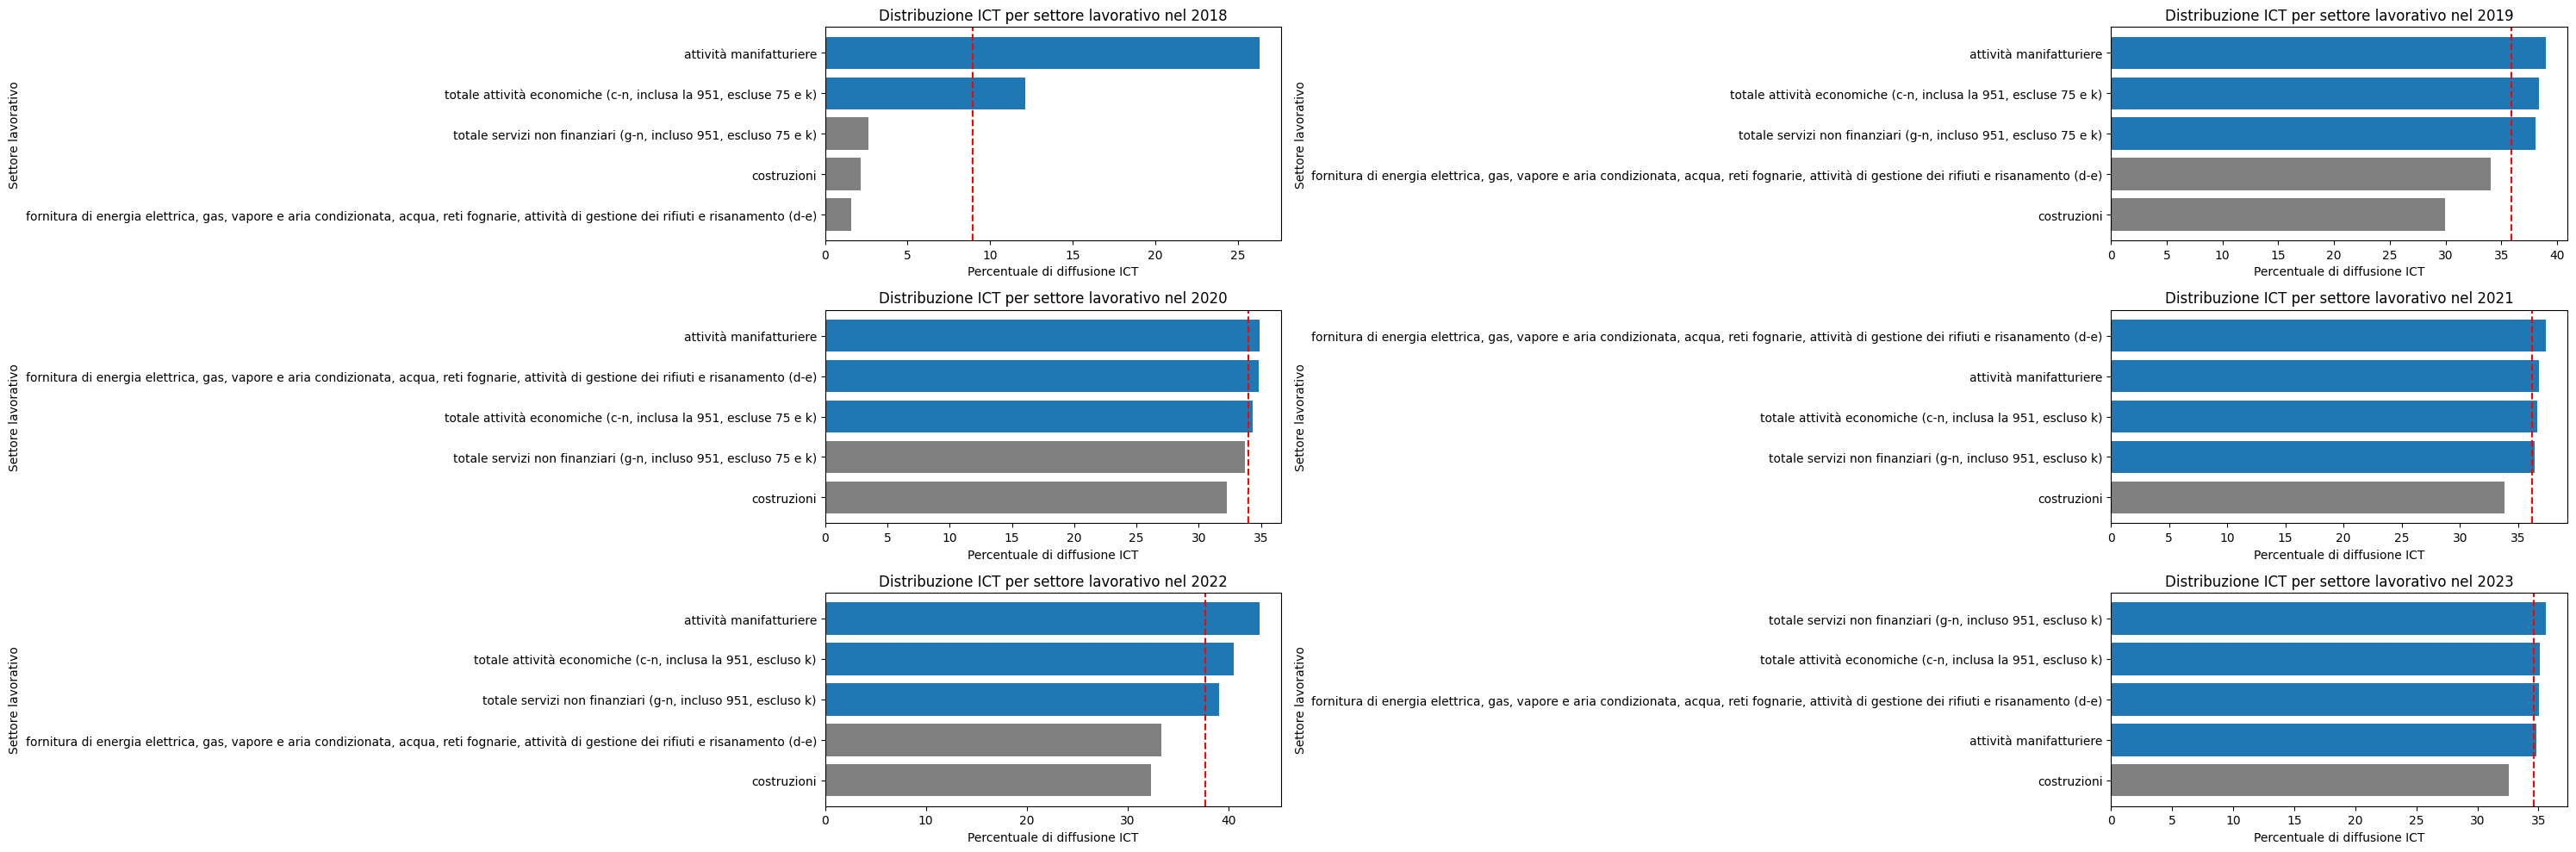

In [284]:
years = df_ict_all["Year"].sort_values().unique()
num_subplots = len(years)
num_rows = int(num_subplots / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 10))

for i, y in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    df_tmp = df_ict_all[df_ict_all["Year"] == y]
    ict_distribution_mean = df_tmp["Value"].mean()
    ict_distribution_sorted = df_tmp.groupby("ATECO desc")["Value"].mean().sort_values()

    ax.barh(ict_distribution_sorted[ict_distribution_sorted < ict_distribution_mean].index, ict_distribution_sorted[ict_distribution_sorted < ict_distribution_mean].values, color="grey")
    ax.barh(ict_distribution_sorted[ict_distribution_sorted >= ict_distribution_mean].index, ict_distribution_sorted[ict_distribution_sorted >= ict_distribution_mean].values)
    ax.axvline(ict_distribution_mean, color="red", linestyle="dashed")

    ax.set_xlabel("Percentuale di diffusione ICT")
    ax.set_ylabel("Settore lavorativo")
    ax.set_title(f"Distribuzione ICT per settore lavorativo nel {y}")

plt.tight_layout()

#### 4.4 **Quarto grafico:** Distribuzione del budget utilizzato in innovazione negli ultimi anni

In [303]:
df_ict_outgoings_history.head()

,TIPO_DATO_CIS,ATECO code,ATECO desc,CLLVT,FORMA_INNOVAZ,Caratteristiche delle imprese,Year,Value
3067,RALLX,74,"altre attività professionali, scientifiche e t...",W_GE10,EXPCGO,spese in conto capitale per l’innovazione (esc...,2020,3193.0
651,RALLX,32,prodotti delle altre industrie manifatturiere,W_GE10,RRDEXX,spesa per l'acquisizione di servizi di ricerc...,2020,30179.0
2881,RALLX,32,prodotti delle altre industrie manifatturiere,W_GE10,EXPINOTH,altre spese per le attività di innovazione (es...,2020,88852.0
2883,RALLX,32,prodotti delle altre industrie manifatturiere,W_GE10,EXPPER,spese per personale interno impegnato nelle at...,2020,46739.0
2885,RALLX,32,prodotti delle altre industrie manifatturiere,W_GE10,EXPSMSP,spese per l’acquisto di beni e servizi destina...,2020,26416.0


In [296]:
df_ict_outgoings_history["CLLVT"].unique()

array(['W_GE10'], dtype=object)

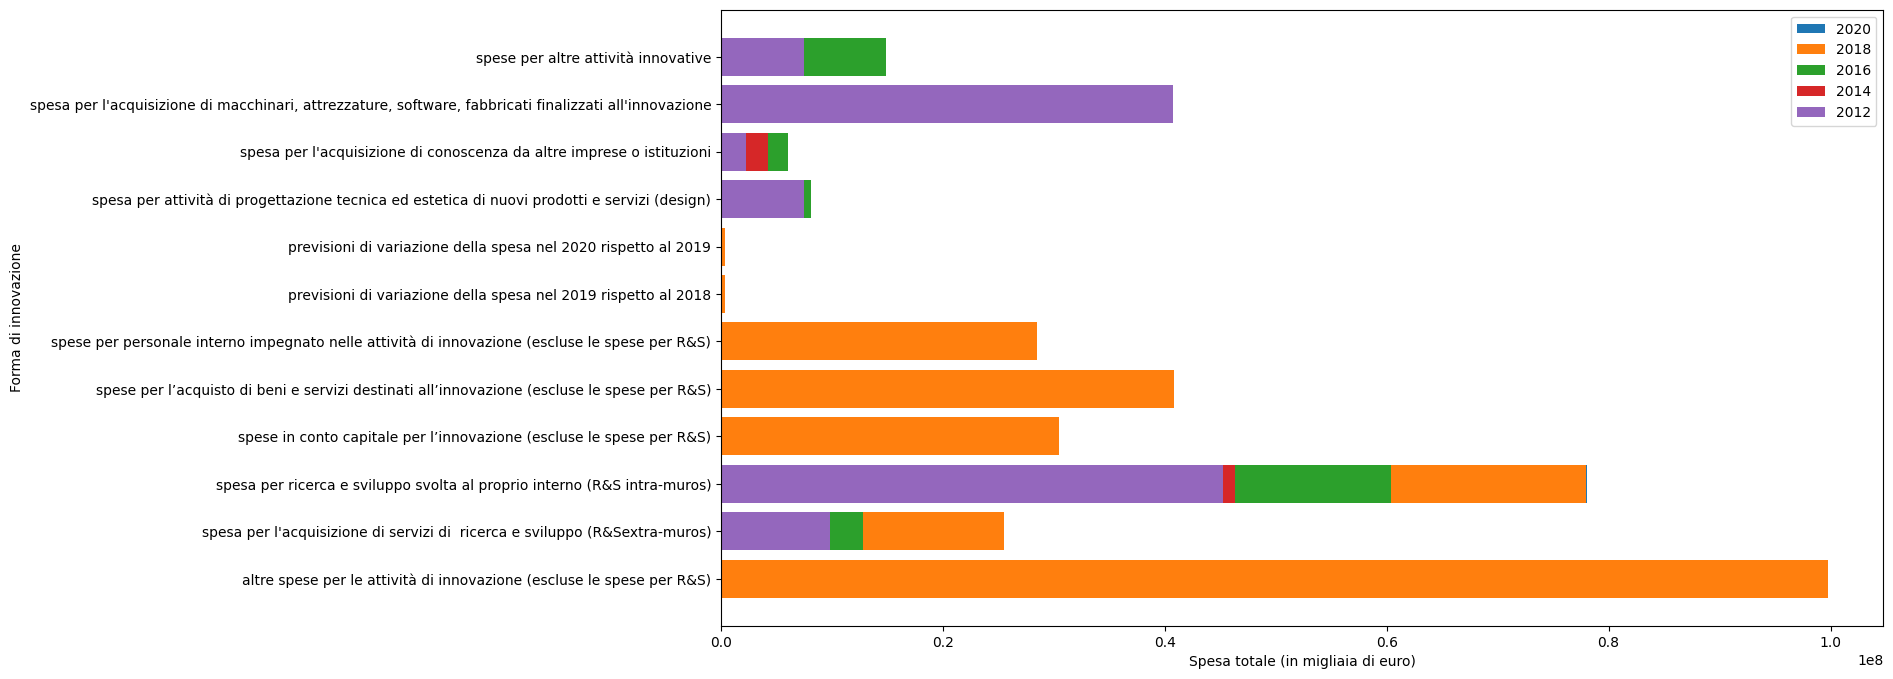

In [340]:
years = df_ict_outgoings_history["Year"].unique()

plt.figure(figsize=(15,8))
for i, y in enumerate(years):
    df_tmp = df_ict_outgoings_history[df_ict_outgoings_history["Year"] == y].groupby("Caratteristiche delle imprese")["Value"].sum()
    plt.barh(df_tmp.index, df_tmp.values, label=f"{y}")

plt.xlabel("Spesa totale (in migliaia di euro)")
plt.ylabel("Forma di innovazione")
plt.legend();

### 5. Conclusioni

Negli ultimi anni l'Italia ha investito sul settore ICT portando ad un buon livello l'innovazione tecnologica nei vari settori lavorativi. Tuttavia sembra che dopo la pandemia da COVID-19 il budget speso dalle aziende in ICT sia diminuito e il tasso medio di adozione dell'ICT abbia rallentato in tutto il mercato del lavoro italiano (dalle piccole alle medie imprese).

In generale possiamo dire che l'ICT in Italia si è diffusa ed evoluta uniformemente in tutte le fasce di dimensioni aziendali e che sia le piccole, che le medie imprese, stanno investendo sugli stessi settori ICT.

Riguardo al nostro obiettivo principale possiamo concludere che ad oggi molti settori lavorativi hanno un livello di adozione ICT sopra la media. Il settore delle costruzioni è quello che sembra essere rimasto sempre indietro rispetto agli altri e dunque è il settore su cui si potrebbe investire in termini di ICT e portare dell'innovazione tecnologica.
Più in generale, quello dell'ICT è un mercato in continua evoluzione e si può considerare un porto sicuro per una vita lavorativa florida.